<a href="https://colab.research.google.com/github/3martharwat/ML-55-18593/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

1. We use the Bank Marketing Dataset from the UCI Machine Learning Repository.
Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

2. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Originally designed for supervised learning, but we will ignore the label initially

Important Decision:

Even though the dataset contains subscribed (whether the client subscribed to a term deposit), we do not use it to train the clustering model.
We may, however, use it later for interpretation only.

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## task 1

### Requirements

The goal of this lab is to **explore the bank dataset, prepare it for clustering, and apply K-Means**.  
Follow these steps carefully and write down your observations.  

### **Exploratory Data Analysis (EDA)** (understanding the dataset and its characteristics)

For each feature, you should:

- Identify **numeric vs categorical features**  
- Check **distributions** of numeric features (min, max, mean, std, skewness)  
- Check **counts of categories** for categorical features  
- Identify **missing or unknown values** and decide how to handle them  
- Look for **correlations** between numeric features  
- Identify **outliers** that may affect clustering  

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/bank.csv', sep=';')
df = df.drop(columns=['y'])
# Display basic info
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (4521, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown



Numeric Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

=== Numeric Feature Summary ===
             min      max         mean          std  skewness
age         19.0     87.0    41.170095    10.576211  0.699501
balance  -3313.0  71188.0  1422.657819  3009.638142  6.596431
day          1.0     31.0    15.915284     8.247667  0.094627
duration     4.0   3025.0   263.961292   259.856633  2.772420
campaign     1.0     50.0     2.793630     3.109807  4.743914
pdays       -1.0    871.0    39.766645   100.121124  2.717071
previous     0.0     25.0     0.542579     1.693562  5.875259


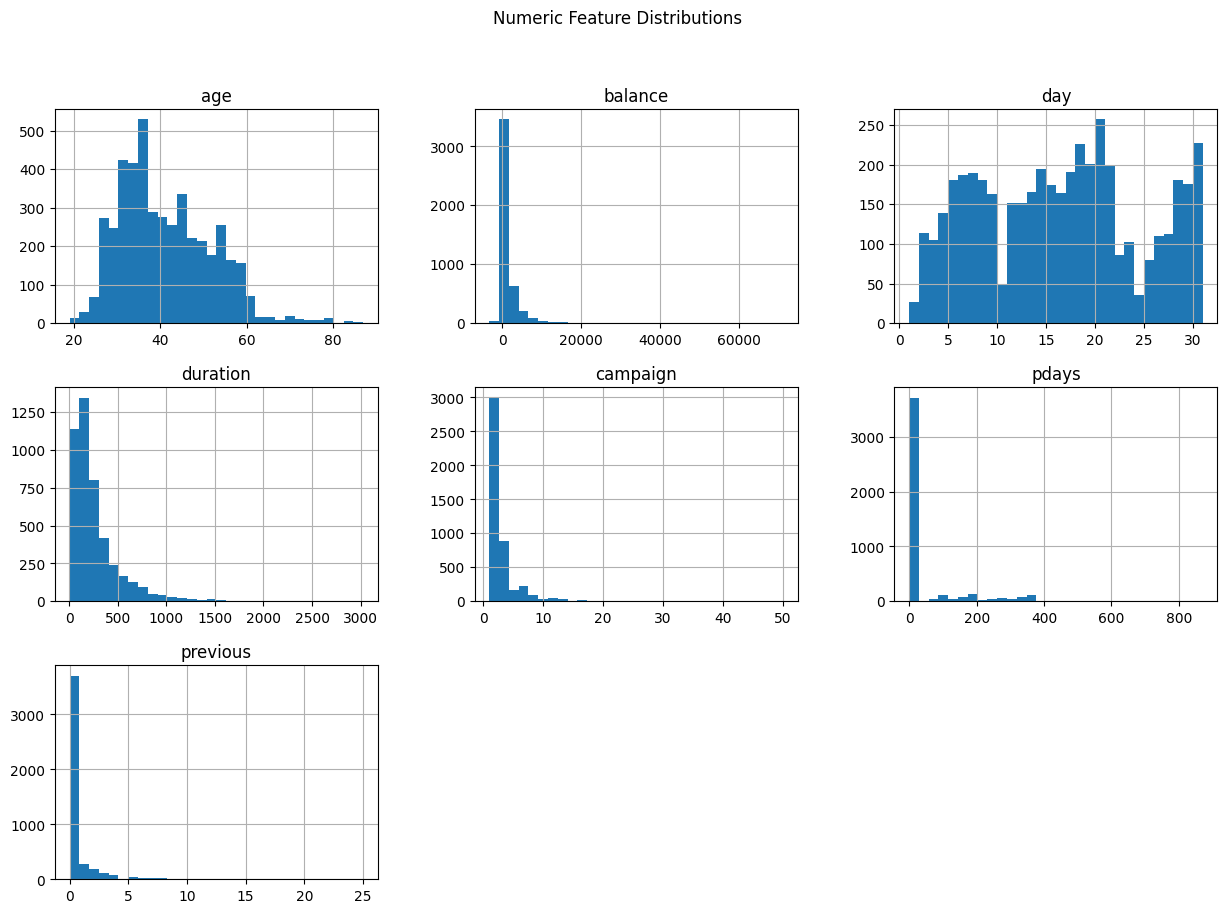

In [16]:
# =========================
# 1. Feature Type Detection
# =========================
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

# =========================
# 2. Numeric Feature Summary
# =========================
numeric_stats = df[numeric_features].agg(['min','max','mean','std']).T
numeric_stats['skewness'] = df[numeric_features].skew()
print("\n=== Numeric Feature Summary ===")
print(numeric_stats)

# =========================
# 3. Numeric Feature Distributions
# =========================
df[numeric_features].hist(figsize=(15,10), bins=30)
plt.suptitle("Numeric Feature Distributions")
plt.show()


In [17]:
# =========================
# 4. Categorical Feature Counts
# =========================
for col in categorical_features:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


job value counts:
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

marital value counts:
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

education value counts:
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

default value counts:
default
no     4445
yes      76
Name: count, dtype: int64

housing value counts:
housing
yes    2559
no     1962
Name: count, dtype: int64

loan value counts:
loan
no     3830
yes     691
Name: count, dtype: int64

contact value counts:
contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

month value counts:
month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222

In [18]:
# =========================
# 5. Unknown Value Analysis
# =========================
print("\n=== Unknown Value Counts ===")
for col in categorical_features:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count} unknown values")


=== Unknown Value Counts ===
job: 38 unknown values
education: 187 unknown values
contact: 1324 unknown values
poutcome: 3705 unknown values


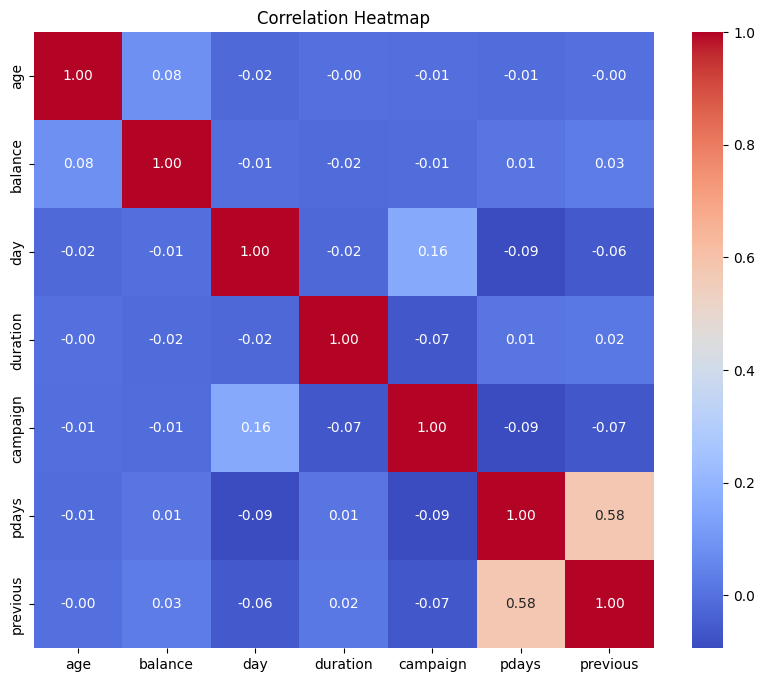

In [19]:
# =========================
# 6. Correlation Analysis
# =========================
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



=== Outlier Detection (IQR) ===
age: 38 outliers
balance: 506 outliers
day: 0 outliers
duration: 330 outliers
campaign: 318 outliers
pdays: 816 outliers
previous: 816 outliers


<Figure size 1500x1000 with 0 Axes>

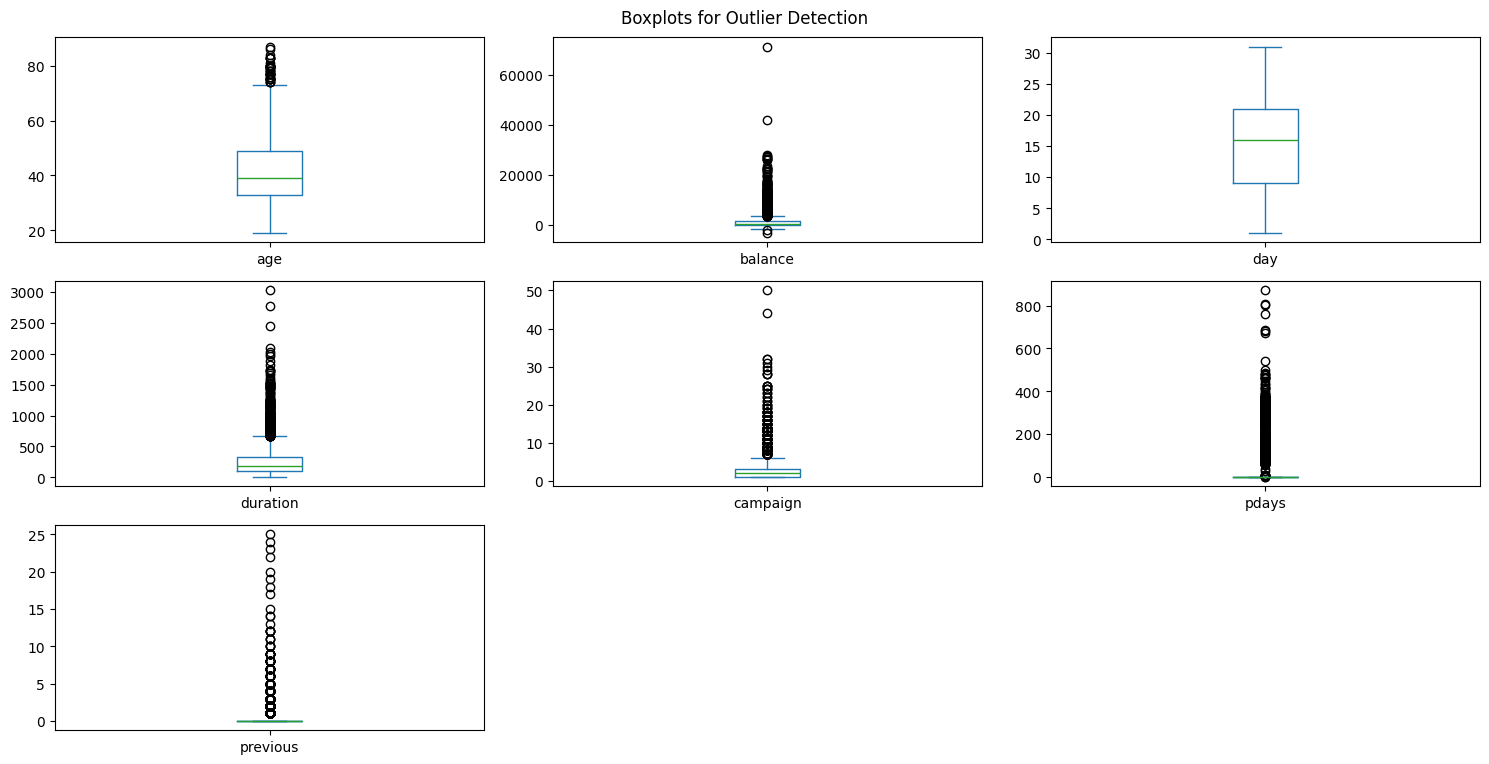

In [20]:
# =========================
# 7. Outlier Detection (IQR Method)
# =========================
print("\n=== Outlier Detection (IQR) ===")
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

# =========================
# 8. Boxplots for Numeric Features
# =========================
plt.figure(figsize=(15,10))
df[numeric_features].plot(kind='box', subplots=True, layout=(4,3), figsize=(15,10))
plt.suptitle("Boxplots for Outlier Detection")
plt.tight_layout()
plt.show()

### **Data Preparation**

Before applying K-Means:

- Drop irrelevant or target columns
- Encode categorical features into numeric format
- Scale numeric features so all are comparable for distance calculations  
- Check that the final dataset has **no missing values** and **all features are numeric**  

In [21]:
from sklearn.preprocessing import StandardScaler

# =========================
# 1. Drop irrelevant columns
# =========================
# Already dropped 'y' in previous step; if any other irrelevant columns exist, drop here
# For example, you could also drop 'duration' if you want realistic clustering
# df = df.drop(columns=['duration'])

# =========================
# 2. Encode categorical features
# =========================
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=False)  # keep all categories

print("Shape after encoding:", df_encoded.shape)

# =========================
# 3. Scale numeric features
# =========================
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# =========================
# 4. Check dataset
# =========================
print("\nFinal dataset info:")
print(df_encoded.info())

print("\nAny missing values?", df_encoded.isnull().sum().sum())

# =========================
# Optional: Preview
# =========================
df_encoded.head()

Shape after encoding: (4521, 51)

Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4521 non-null   float64
 1   balance              4521 non-null   float64
 2   day                  4521 non-null   float64
 3   duration             4521 non-null   float64
 4   campaign             4521 non-null   float64
 5   pdays                4521 non-null   float64
 6   previous             4521 non-null   float64
 7   job_admin.           4521 non-null   bool   
 8   job_blue-collar      4521 non-null   bool   
 9   job_entrepreneur     4521 non-null   bool   
 10  job_housemaid        4521 non-null   bool   
 11  job_management       4521 non-null   bool   
 12  job_retired          4521 non-null   bool   
 13  job_self-employed    4521 non-null   bool   
 14  job_services         4521 non-null

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734,False,False,False,...,False,False,True,False,False,False,True,False,False,False
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,False,True,False,...,False,False,True,False,False,False,False,False,False,True


### **Apply K-Means Clustering**

- Decide an initial number of clusters (K)  
- Fit the K-Means model to your prepared dataset  
- Assign each data point to a cluster

In [26]:
from sklearn.cluster import KMeans

# =========================
# 1. Decide initial K
# =========================
# You can pick K from prior Elbow/Silhouette analysis, e.g., 4
initial_k = 4

# =========================
# 2. Fit K-Means model
# =========================
kmeans = KMeans(n_clusters=initial_k, init='k-means++', random_state=42)
kmeans.fit(df_encoded)

# =========================
# 3. Assign clusters
# =========================
df['Cluster'] = kmeans.labels_

# =========================
# 4. Inspect cluster assignment
# =========================
print("\nCluster counts:")
print(df['Cluster'].value_counts())

print("\nSample rows with cluster assignment:")
print(df.head())


Cluster counts:
Cluster
0    2327
2    1478
3     619
1      97
Name: count, dtype: int64

Sample rows with cluster assignment:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  Cluster  
0  cellular   19   oct        79         1     -1         0  unknown        0  
1  cellular   11   may       220         1    339         4  failure        3  
2  cellular   16   apr       185         1    330         1  failure        3  
3   unknown    3   jun       199         4     -1         0  unknown        0  
4   unknown    5   may       226

### **Choosing the Convenient K**

- Use **Elbow Method**: plot Sum of Squared Distances (SSD) vs K  
- Identify the **elbow point** where SSD reduction slows  
- Calculate **Silhouette scores** to validate K  

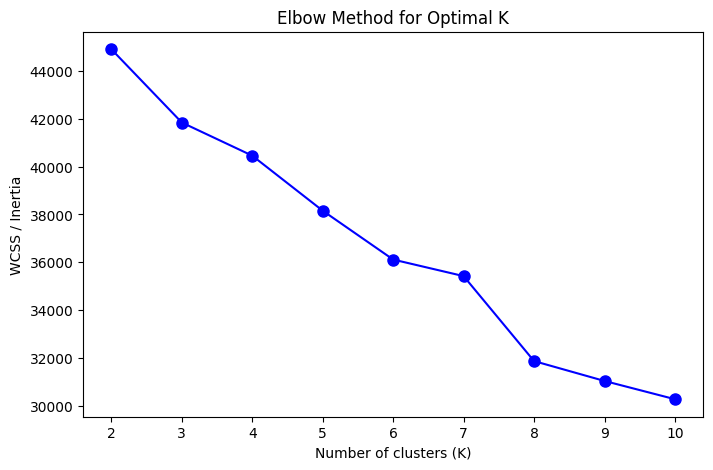

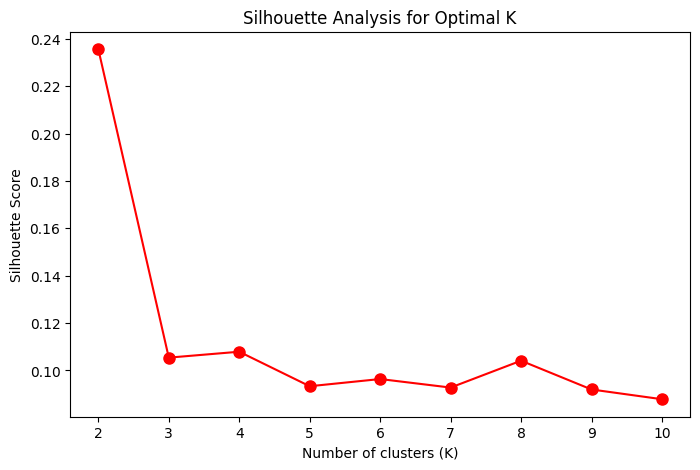

Silhouette scores for different K values:
K = 2, Silhouette Score = 0.2356
K = 3, Silhouette Score = 0.1054
K = 4, Silhouette Score = 0.1079
K = 5, Silhouette Score = 0.0933
K = 6, Silhouette Score = 0.0964
K = 7, Silhouette Score = 0.0928
K = 8, Silhouette Score = 0.1041
K = 9, Silhouette Score = 0.0919
K = 10, Silhouette Score = 0.0878


In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# =========================
# 1. Define range of K
# =========================
K_range = range(2, 11)  # Start from 2, since 1 cluster is trivial
wcss = []                # Sum of squared distances (inertia)
sil_scores = []          # Silhouette scores

# =========================
# 2. Compute WCSS and Silhouette scores
# =========================
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(df_encoded)

    # WCSS / Inertia
    wcss.append(kmeans.inertia_)

    # Silhouette score
    score = silhouette_score(df_encoded, labels)
    sil_scores.append(score)

# =========================
# 3. Plot Elbow Method
# =========================
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS / Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# =========================
# 4. Plot Silhouette Scores
# =========================
plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, 'ro-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

# =========================
# 5. Print Silhouette Scores
# =========================
print("Silhouette scores for different K values:")
for k, score in zip(K_range, sil_scores):
    print(f"K = {k}, Silhouette Score = {score:.4f}")